In [1]:
## Imports

import numpy as np

In [2]:
## Writing the cost function

def cost(X,y,theta):
    m = len(y)
    predictions = X.dot(theta) # Since the prediction = (X^T)theta
    errors = predictions - y
    cost = (1/(2*m)) * np.dot(errors.T, errors) 
    # errors = prediction - y => h(x) - y since cost function is the (h(x) - y)^2 we take np.dot product
    # We need to calculate this in the form of vector only as the errors are vectors here, E^T . E => [e1^2 + e2^2 ....]

    return cost

In [3]:
## Gradient Descent Algorithm

def gd(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y) # d/dx(theta) (J(0)) = x^T (X0) .. calculated via the Vector method
        theta -= alpha * gradient
        cost_history.append(cost(X,y, theta))
    
    return theta, cost_history

In [ ]:
## Usage example 

x = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 4, 9, 16, 25])

x_b = np.c_[np.ones((x.shape[0], 1)), x]

print(x_b)

theta_init = np.zeros(x_b.shape[1])
alpha = 0.01
iterations = 5000

theta_gd , cost_h = gd(x_b, y, theta_init, alpha, iterations)

In [7]:
## Loading the Salary data from the csv
import csv

with open("synthetic_salary_data.csv", 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    data = list()
    for r in reader:
        data.append(r)



In [62]:
## Creating the x and y i.e. input and expectedoutput  set from the raw data.

preprocess_x = []
y = []
for i in range(1, len(data)):
    row = data[i]
    preprocess_x.append([float(row[0])])
    y.append(float(row[1]))

x = np.array(preprocess_x)

## Normalization and standardization

mean_x = np.mean(x)
std_x = np.std(x)
x_scaled = (x - mean_x) / std_x


y = np.array(y)
x_b = np.c_[np.ones((x_scaled.shape[0], 1)), x_scaled]
theta_init = np.zeros(x_b.shape[1])
alpha = 0.01
iterations = 1500
theta_gd , cost_h = gd(x_b, y, theta_init, alpha, iterations)

In [63]:
print("the calculated cost function is : ", cost_h)
print("The Minimum obtained cost function is : ", min(cost_h))
print("The theta new is : ", theta_gd)

the calculated cost function is :  [5584478284.814654, 5473684507.254555, 5365095525.867905, 5258667465.210846, 5154357322.960863, 5052122952.541656, 4951923046.093788, 4853717117.784238, 4757465487.448044, 4663129264.55554, 4570670332.498599, 4480051333.189589, 4391235651.966828, 4304187402.800404, 4218871413.7923875, 4135253212.965632, 4053299014.3353295, 3972975704.2577696, 3894250828.0507536, 3817092576.8802576, 3741469774.9080524, 3667351866.695095, 3594708904.855575, 3523511537.956664, 3453730998.659039, 3385339092.093437, 3318308184.4684906, 3252611191.905282, 3188221569.4940796, 3125113300.568861, 3063260886.195254, 3002639334.8676805, 2943224152.4115267, 2884991332.0862517, 2827917344.885448, 2771979130.0299416, 2717154085.6500583, 2663420059.6533365, 2610755340.7739477, 2559138649.8002586, 2508549130.976947, 2458966343.578219, 2410370253.648726, 2362741225.9088306, 2316060015.8209567, 2270307761.813833, 2225465977.6614513, 2181516545.013702, 2138441706.0756419, 2096224056.432

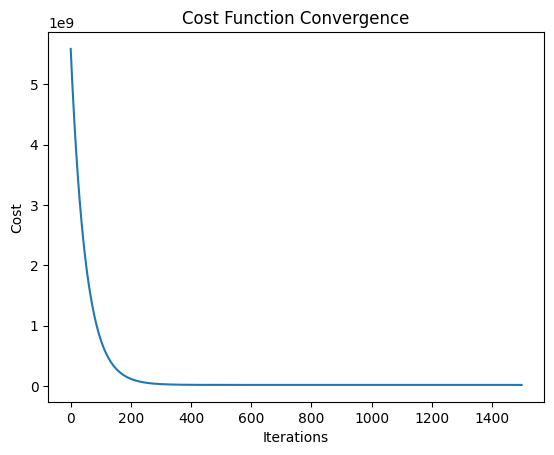

In [64]:
import matplotlib.pyplot as plt

plt.plot(cost_h)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [68]:
x_new = 10.97
x_test_scaled = (x_new - mean_x) / std_x

x_test_vector = np.array([1, x_test_scaled])
y_pred = x_test_vector.dot(theta_gd)
print(y_pred)

128529.16004642943
